In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df = pd.read_csv('../experiments/sw-data/amd.csv')
# df = pd.read_csv('../experiments/sw-data/sigmax.csv')

df['throughput'] = df['bytes_in'] / df['time']
# df.set_index(['framework', 'api', 'allocated', 'max_values', 'num_jsons'], inplace=True)
df.sort_values(['max_values', 'throughput'], inplace=True)
display(df)


,framework,api,allocated,max_values,num_jsons,bytes_in,bytes_out,time,throughput
8,ANTLR4,NaN,False,1,7271551,134217732,87258604,11.777000,1.139660e+07
3,RapidJSON,DOM,False,1,7271551,134217732,87258604,0.627121,2.140221e+08
4,RapidJSON,DOM (in situ),False,1,7271551,134217732,87258604,0.571077,2.350256e+08
7,Custom,whitespaces,False,1,7271551,134217732,87258604,0.389462,3.446234e+08
5,RapidJSON,SAX,False,1,7271551,134217732,87258604,0.311981,4.302112e+08
0,simdjson,DOM,False,1,7271551,134217732,87258604,0.281763,4.763497e+08
6,RapidJSON,SAX,True,1,7271551,134217732,87258604,0.271038,4.951989e+08
1,simdjson,DOM,True,1,7271551,134217732,87258604,0.254163,5.280774e+08
2,simdjson,DOM (no keys),True,1,7271551,134217732,87258604,0.248085,5.410151e+08
9,Boost Spirit.X3,whitespace,False,1,7271551,134217732,87258604,0.117213,1.145075e+09


In [3]:
dg = df.groupby(['framework', 'max_values', 'bytes_in', 'bytes_out']).agg({'throughput':'max'})
dg.sort_values(by=['framework', 'max_values'], inplace=True)
dg['Throughput (GB/s)'] = dg.throughput * 1e-9
del dg['throughput']
display(dg)


Throughput (GB/s)
framework       max_values bytes_in  bytes_out                   
ANTLR4          1          134217732 87258604            0.011397
                2          134217737 103798904           0.010839
                4          134217740 128303440           0.010411
                8          134217764 157861596           0.008992
                16         134217768 186337836           0.009078
                32         134217827 208512692           0.008729
                64         134217903 223034756           0.008553
                128        134217816 231471012           0.008548
                256        134218013 236026080           0.008496
                512        134217919 238415680           0.008492
                1024       134218095 239631092           0.008626
Boost Spirit.X3 1          134217732 87258604            1.145075
                2          134217737 103798904           0.847532
                4          134217740 128303440           0.763342
                8          134217764 157861596           0.669632
                16         134217768 186337836           0.635083
                32         134217827 208512692           0.585812
                64         134217903 223034756           0.583120
                128        134217816 231471012           0.576176
                256        134218013 236026080           0.583179
                512        134217919 238415680           0.581400
                1024       134218095 239631092           0.588903
Custom          1          134217732 87258604            0.344623
                2          134217737 103798904           0.337872
                4          134217740 128303440           0.290616
                8          134217764 157861596           0.280742
                16         134217768 186337836           0.272553
                32         134217827 208512692           0.255679
                64         134217903 223034756           0.260024
                128        134217816 231471012           0.257488
                256        134218013 236026080           0.260298
                512        134217919 238415680           0.258579
                1024       134218095 239631092           0.258935
RapidJSON       1          134217732 87258604            0.495199
                2          134217737 103798904           0.481939
                4          134217740 128303440           0.461012
                8          134217764 157861596           0.439698
                16         134217768 186337836           0.439219
                32         134217827 208512692           0.403305
                64         134217903 223034756           0.426416
                128        134217816 231471012           0.440344
                256        134218013 236026080           0.440134
                512        134217919 238415680           0.441644
                1024       134218095 239631092           0.441933
simdjson        1          134217732 87258604            0.541015
                2          134217737 103798904           0.613357
                4          134217740 128303440           0.543887
                8          134217764 157861596           0.487241
                16         134217768 186337836           0.470797
                32         134217827 208512692           0.461163
                64         134217903 223034756           0.450275
                128        134217816 231471012           0.453480
                256        134218013 236026080           0.447804
                512        134217919 238415680           0.451619
                1024       134218095 239631092           0.450800

In [4]:
dh = dg.unstack('framework')
dh.index.rename(inplace=True, names=['Max. values', 'Bytes in', 'Bytes out'])
dh = dh.droplevel(0, axis=1)
display(dh)

,,framework,ANTLR4,Boost Spirit.X3,Custom,RapidJSON,simdjson
Max. values,Bytes in,Bytes out,,,,,
1,134217732,87258604,0.011397,1.145075,0.344623,0.495199,0.541015
2,134217737,103798904,0.010839,0.847532,0.337872,0.481939,0.613357
4,134217740,128303440,0.010411,0.763342,0.290616,0.461012,0.543887
8,134217764,157861596,0.008992,0.669632,0.280742,0.439698,0.487241
16,134217768,186337836,0.009078,0.635083,0.272553,0.439219,0.470797
32,134217827,208512692,0.008729,0.585812,0.255679,0.403305,0.461163
64,134217903,223034756,0.008553,0.583120,0.260024,0.426416,0.450275
128,134217816,231471012,0.008548,0.576176,0.257488,0.440344,0.453480
256,134218013,236026080,0.008496,0.583179,0.260298,0.440134,0.447804


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


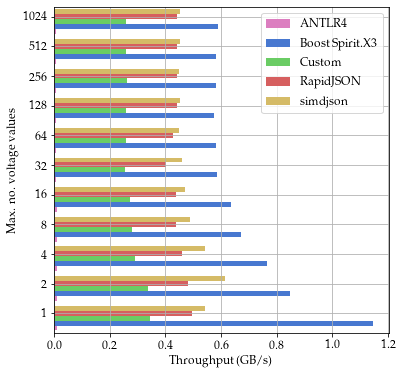

In [5]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "font.size": 12
})

#dh.columns.rename(inplace=True, name='Framework')
#dh.index.rename(inplace=True, name='Max. values')

fig, ax = plt.subplots(figsize=(6, 6))
colors = ['#dc7ec0', '#4878d0', '#6acc64', '#d65f5f', '#d5bb67']

y_labels = [x[0] for x in dh.index.to_list()]
y_ticks = np.arange(0, len(y_labels))

impls = dh.columns.to_list()
bars = []
height = 1/(len(impls)+1)

for i, impl in enumerate(impls):
    x = dh[impl].to_numpy()
    y = np.arange(0, len(x))

    b = ax.barh(y=y+i*height, width=x, height=height, color=colors[i])
    bars.append(b)

ax.set_ylim(-height, len(y_labels)-height)

ax.set_yticks(y_ticks + 0.5)
ax.set_yticklabels(y_labels)
ax.set_ylabel("Max. no. voltage values")

ax.set_xlabel("Throughput (GB/s)")

ax.grid(which='both')

ax.legend(bars, impls)

fig.savefig('software.pdf')